In [3]:
!pip install mtcnn

1/1 [==============================] - 0s 309ms/step


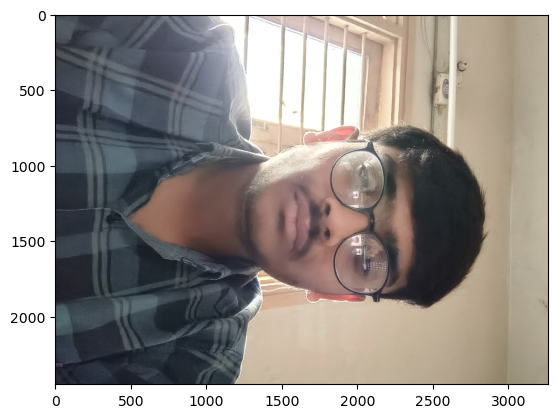

In [10]:
import matplotlib.pyplot as plt
import mtcnn
from mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle


def draw_facebox(filename, result_list):
  # load the image
  data = plt.imread(filename)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
  # load image from file


filename = "Data/train/Jay/IMG_20240130_151415242.jpg" #File location
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

In [26]:
import cv2 as cv

img = cv.cvtColor(cv.imread("Data/train/Jay/IMG_20240130_151415242.jpg"),cv.COLOR_BGR2RGB)
detector = MTCNN()
face = detector.detect_faces(img)

1/1 [==============================] - 0s 368ms/step


In [27]:
import numpy as np
boundries = np.array([face[0]['box']])

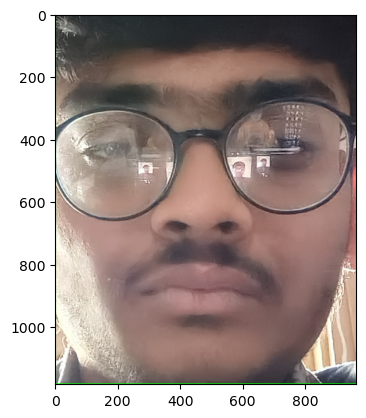

In [30]:
for (x,y,w,h) in boundries:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=3)
    plt.imshow(img[y:y+h,x:x+w])

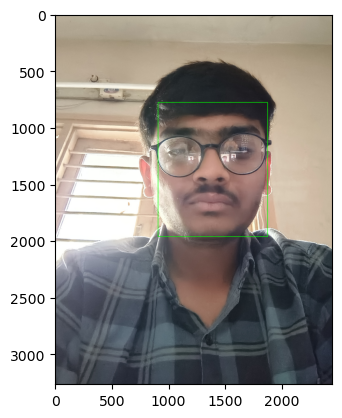

In [29]:
plt.imshow(img)

In [31]:
cv.imread("Data/train/Jay/IMG_20240130_151415242.jpg")

array([[[151, 173, 184],
        [152, 174, 185],
        [152, 174, 185],
        ...,
        [137, 158, 166],
        [137, 158, 166],
        [139, 160, 168]],

       [[151, 173, 184],
        [151, 173, 184],
        [151, 173, 184],
        ...,
        [135, 156, 164],
        [136, 157, 165],
        [139, 160, 168]],

       [[154, 176, 187],
        [154, 176, 187],
        [154, 176, 187],
        ...,
        [134, 155, 163],
        [134, 155, 163],
        [138, 159, 167]],

       ...,

       [[ 66,  60,  55],
        [ 66,  60,  55],
        [ 65,  59,  54],
        ...,
        [ 49,  39,  39],
        [ 44,  34,  34],
        [ 38,  28,  28]],

       [[ 61,  55,  50],
        [ 60,  54,  49],
        [ 61,  55,  50],
        ...,
        [ 55,  45,  45],
        [ 49,  39,  39],
        [ 37,  27,  27]],

       [[ 63,  57,  52],
        [ 61,  55,  50],
        [ 63,  57,  52],
        ...,
        [ 54,  44,  44],
        [ 50,  40,  40],
        [ 37,  27,  27]]

In [32]:
img

array([[[184, 173, 151],
        [185, 174, 152],
        [185, 174, 152],
        ...,
        [166, 158, 137],
        [166, 158, 137],
        [168, 160, 139]],

       [[184, 173, 151],
        [184, 173, 151],
        [184, 173, 151],
        ...,
        [164, 156, 135],
        [165, 157, 136],
        [168, 160, 139]],

       [[187, 176, 154],
        [187, 176, 154],
        [187, 176, 154],
        ...,
        [163, 155, 134],
        [163, 155, 134],
        [167, 159, 138]],

       ...,

       [[ 55,  60,  66],
        [ 55,  60,  66],
        [ 54,  59,  65],
        ...,
        [ 39,  39,  49],
        [ 34,  34,  44],
        [ 28,  28,  38]],

       [[ 50,  55,  61],
        [ 49,  54,  60],
        [ 50,  55,  61],
        ...,
        [ 45,  45,  55],
        [ 39,  39,  49],
        [ 27,  27,  37]],

       [[ 52,  57,  63],
        [ 50,  55,  61],
        [ 52,  57,  63],
        ...,
        [ 44,  44,  54],
        [ 40,  40,  50],
        [ 27,  27,  37]]

In [2]:
import dlib
import cv2

In [3]:
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_detector(gray)

    for face in faces:
        # Extract the face region
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),thickness=2)
        
    cv2.imshow("video",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.Inceptionresnet import *
import tensorflow as tf
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Input,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
from keras.models import Model
import h5py
import numpy as np

facenet_encoder = InceptionResNetV2()
facenet_encoder.load_weights("utils/facenet_keras_weights.h5")
FRmodel = facenet_encoder

from skimage.transform import resize

def img_to_encoding(image, model):
    img = cv.resize(image,(160,160))
    img = np.around(np.asarray(img)/255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

filepath = "extract_face/"
database = {}

def load_image(filepath):
    
    for folder in os.listdir(filepath):
        encodings = []
        for subfolder in os.listdir(filepath+folder):
            image_BGR = cv.imread(filepath + folder + "/" + subfolder)
            
            temp = img_to_encoding(image_BGR,FRmodel)
            encodings.append(temp)
        database[folder] = encodings
    return database
        
    
database = load_image(filepath)


#face recognition
def who_is_it(image, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE
    
#     image_RGB = cv.cvtColor(image,cv.COLOR_BGR2RGB)
#     pixel = detector.detect_faces(image_RGB)
#     x,y,w,h = pixel[0]['box']
#     img = image_RGB[y:y+h,x:x+w]

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  img_to_encoding(image,model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        for i in db_enc:
            # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
            dist = np.linalg.norm(encoding - i)

            # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
            if dist<min_dist:
                min_dist = dist
                identity = name
    ### END CODE HERE
    
    if min_dist > 0.6:
        print()
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
        
    return min_dist, identity

haar_casecade = cv.CascadeClassifier("utils/haar_face.xml")

cap = cv.VideoCapture(0)
# fourcc = cv.VideoWriter_fourcc(*'XVID')
# out = cv.VideoWriter("output.mp4",fourcc,10.00,(640,480))

while True:
    content,frame = cap.read()
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
#     image_RGB = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    faces = haar_casecade.detectMultiScale(gray,
                                          scaleFactor=1.2,
                                          minNeighbors=10,
                                        )
    
#     face = detector.detect_faces(image_RGB)
#     if face != []:
#         box = np.array([face[0]['box']])
    
#     face_detector = dlib.get_frontal_face_detector()
#     landmark_predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")
    
    #faces = face_detector(gray)

    for (x,y,w,h) in faces:
        
        #x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),thickness=2)
        # Extract the face region
        face1 = frame[y:y+h, x:x+w]
        
        
        # Perform face alignment using facial landmarks
        face_locations = face_recognition.face_locations(frame)
        face_landmarks = face_recognition.face_landmarks(frame, face_locations)
        #print(face_landmarks)

#         for landmarks in face_landmarks:
#             # Get coordinates of left eye, right eye, and nose tip
#             left_eye = landmarks['left_eye']
#             right_eye = landmarks['right_eye']
#             nose_tip = landmarks['nose_tip']

#             # Calculate the center of mass for the eyes
#             left_eye_center = np.mean(left_eye, axis=0).astype(int)
#             right_eye_center = np.mean(right_eye, axis=0).astype(int)

#             # Calculate the angle between the eyes
#             angle = np.degrees(np.arctan2(right_eye_center[1] - left_eye_center[1], right_eye_center[0] - left_eye_center[0]))

#             # Perform rotation to align the face
#             rotation_matrix = cv.getRotationMatrix2D(tuple(nose_tip[0]), angle, scale=1)
#             aligned_face = cv.warpAffine(face, rotation_matrix, (w, h), flags=cv.INTER_LINEAR)

            
        mindist,identity = who_is_it(face1,database,FRmodel)

        if mindist<0.6:
            cv.putText(frame,identity,(x,y-10),cv.FONT_HERSHEY_PLAIN,2,(0,255,0),2,cv.LINE_AA)           
#         else:
#             cv.putText(frame,'Unknown',(x,y-10),cv.FONT_HERSHEY_PLAIN,2,(0,0,255),2,cv.LINE_AA)
            
    #out.write(frame)


    cv.imshow("video",frame)
    
    if cv.waitKey(2) & 0xFF == ord('x'):
        break

cap.release()
#out.release()
cv.destroyAllWindows()


In [1]:
!pip install mediapipe --user

In [3]:
import time
import cv2 as cv
import mediapipe as mp
import numpy as np

mp_face_detection = mp.solutions.face_detection
cap = cv.VideoCapture(0)
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detector:
    frame_counter = 0
    fonts = cv.FONT_HERSHEY_PLAIN
    start_time = time.time()
    while True:
        frame_counter += 1
        ret, frame = cap.read()
        if ret is False:
            break
        rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        results = face_detector.process(rgb_frame)
        frame_height, frame_width, c = frame.shape
        if results.detections:
            for face in results.detections:
                face_react = np.multiply(
                    [
                        face.location_data.relative_bounding_box.xmin,
                        face.location_data.relative_bounding_box.ymin,
                        face.location_data.relative_bounding_box.width,
                        face.location_data.relative_bounding_box.height,
                    ],
                    [frame_width, frame_height, frame_width, frame_height]).astype(int)
                
                cv.rectangle(frame, face_react, color=(255, 255, 255), thickness=2)
#                 key_points = np.array([(p.x, p.y) for p in face.location_data.relative_keypoints])
#                 key_points_coords = np.multiply(key_points,[frame_width,frame_height]).astype(int)
#                 for p in key_points_coords:
#                     cv.circle(frame, p, 4, (255, 255, 255), 2)
#                     cv.circle(frame, p, 2, (0, 0, 0), -1)
        
        fps = frame_counter / (time.time() - start_time)
        cv.putText(frame,f"FPS: {fps:.2f}",(30, 30),cv.FONT_HERSHEY_DUPLEX,0.7,(0, 255, 255),2,)
        cv.imshow("frame", frame)
        key = cv.waitKey(1)
        if key == ord("x"):
            break
    cap.release()
    cv.destroyAllWindows() 

In [14]:
import mediapipe 

SyntaxError: invalid syntax (621010447.py, line 1)